# Speech Emotion Recognition - SER

**Definition**

Speech Emotion Recognition or SER is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.

**Why we need it?**

Emotion recognition is the part of speech recognition which is gaining more popularity and need for it increases enormously. Although there are methods to recognize emotion using machine learning techniques, this project attempts to use deep learning to recognize the emotions from data.

**For example**
1. SER is used in call center for classifying calls according to emotions and can be used as the performance parameter for conversational analysis thus identifying the unsatisfied customer, customer satisfaction and so on.. for helping companies improving their services
2. It can also be used in-car board system based on information of the mental state of the driver can be provided to the system to initiate his/her safety preventing accidents to happen

### Action Items:


<font color='yellow'>19/04 - 21/04</font>

1) <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Share Data - Organize and share cleaned data with Izhar and Netanel by compressing it into a ZIP file and placing it under the "data" folder within the project directory. Ensure to update the project's ignore file to include this data path. <font color='blue'>Victor</font>
    </label><br>
    
2) Target definition:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Define our primary objective or target score based on our specific use case and objectives. <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font>
    </label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Work on refining scoring methods. <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font>
    </label><br>
    
3) Integration and Refactoring - Merge our codebases into a unified project for seamless collaboration:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Refine the correlation heatmap to display correlations between different features, aiming to identify redundant features, reduce runtime, and enhance efficiency. <font color='blue'>Victor</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Revamp the feature importance plot according to Netanel's implementation, ensuring visual clarity with colors, titles, and labels. <font color='green'>Netanel</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Adjust the label histogram orientation to vertical and integrate it into our workflow to visualize the data before and after splitting. <font color='green'>Netanel</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Convert Victor's feature data from Numpy objects to Pandas for seamless integration and utilize the opportunity to familiarize ourselves with Pandas functionality. <font color='blue'>(Victor)</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Refactor lengthy functions into smaller, more manageable ones to enhance code readability and project structure. <font color='blue'>Victor</font></label><br>
    
4) Feature Engineering methods - Work on refining features, dimensionality reduction techniques, and feature selection strategies:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Develop a function to filter out less important features, determining a suitable threshold collaboratively.  <font color='blue'>Victor</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Utilize efficient methods such as scatter transform. <font color='red'>(???)</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Lasso for feature selection without resorting to loops. <font color='blue'>Victor</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Apply PCA for dimensionality reduction, setting 'explained_variance_ratio' to retain 95% of the feature efficiency while reducing the feature count. <font color='red'>(???)</font></label><br>
    
5) <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">MiniRocket - Finilyze this method and get its best contribution for feature extraction. <font color='magenda'>Yizhar</font></label><br>

<font color='yellow'>22/04 - 30/04   (Some of us will not be available part of these days due to Passover holiday)</font>

6)  <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">GridSearch - Determine the hyperparameters to optimize and prepare for grid search using sklearn. Employ 'n_jobs' to expedite the parameter tuning process. <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font></label><br> 


<font color='yellow'>01/05 - 04/05</font>

7) Presentation:  
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Collaboratively select a presentation template and distribute responsibilities for slide creation (10-15 slides total). <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Edit the presentation content, ensuring each slide clearly communicates its intended message with relevant plots, formulas, and explanations. <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font></label><br>
    <input type="checkbox" id="checkbox1" name="checkbox1">
    <label for="checkbox1">Dedicate time to presentation editing and rehearsal. <font color='magenda'>Yizhar</font>,<font color='green'>Netanel</font>,<font color='blue'>Victor</font></label><br>

In [11]:
from typing import List, Tuple, Dict, Optional
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import confusion_matrix, classification_report, PrecisionRecallDisplay, precision_recall_curve, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve # type: ignore
from sklearn.utils.class_weight import compute_class_weight

# librosa = Python library for analyzing audio and music. It can be used to extract the audio features from the audio files
import librosa # type: ignore
import librosa.display # type: ignore

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [12]:
# CONSTANTS

# PATHS
features_path = 'data/features.csv'

# DATASET
feature_groups ={}
mel_size = 120
chroma_size = 12
mfcc_size = 20

# COLORS
group_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'navy', 'lime', 'teal', 'aqua', 'maroon', 'fuchsia', 'silver', 'gold', 'crimson', 'coral', 'indigo', 'ivory', 'khaki', 'lavender', 'magenta', 'orchid', 'plum', 'salmon', 'sienna', 'tan', 'thistle', 'turquoise', 'violet', 'wheat']
RED = '\033[91m'
GREEN = '\033[92m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Reset color to default

# function to select colors for the groups
def select_colors(group_colors, number_of_groups):
    repetitions = number_of_groups // len(group_colors) + 1
    selected_colors = group_colors * repetitions
    return selected_colors[:number_of_groups]

# Example usage:
selected_colors = select_colors(group_colors, 10)
print(selected_colors)


['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown', 'pink']


### FUNCTIONS:

In [13]:
# Plots a confusion matrix using Seaborn's heatmap.
# def plot_confusion_matrix(y_test, y_pred, labels):
#     """
#     Plots a confusion matrix using Seaborn's heatmap.

#     Parameters:
#     y_true (numpy.ndarray): The true labels.
#     y_pred (numpy.ndarray): The predicted labels.
#     labels (numpy.ndarray): The unique labels in the dataset.
#     """
   
#     # Create confusion matrix
#     cm = confusion_matrix(y_true = y_test, y_pred = y_pred, labels=labels, normalize = 'true')
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot(values_format='.2f')
#     plt.title("confusion matrix")
#     plt.show()

def plot_confusion_matrix(vY: np.ndarray, vYPred: np.ndarray, normMethod: str = None, hA: Optional[plt.Axes] = None, 
                        lLabels: Optional[List] = None, dScore: Optional[Dict] = None, titleStr: str = 'Confusion Matrix', 
                        xLabelRot: Optional[int] = None, valFormat: Optional[str] = None) -> Tuple[plt.Axes, np.ndarray]:
    # Calculation of Confusion Matrix
    mConfMat = confusion_matrix(vY, vYPred, normalize = normMethod)
    oConfMat = ConfusionMatrixDisplay(mConfMat, display_labels = lLabels)
    oConfMat = oConfMat.plot(ax = hA, values_format = valFormat)
    hA = oConfMat.ax_
    if dScore is not None:
        titleStr += ':'
        for scoreName, scoreVal in  dScore.items():
            titleStr += f' {scoreName} = {scoreVal:0.2},'
        titleStr = titleStr[:-1]
    hA.set_title(titleStr)
    hA.grid(False)
    if xLabelRot is not None:
        for xLabel in hA.get_xticklabels():
            xLabel.set_rotation(xLabelRot)
    return hA, mConfMat

def plot_train_test_histogram(y_train, y_test):
    # Count occurrences of each emotion label in y_train and y_test
    train_labels, train_counts = np.unique(y_train, return_counts=True)
    test_labels, test_counts = np.unique(y_test, return_counts=True)

    # Get unique emotion labels
    emotions = np.unique(np.concatenate((y_train, y_test)))

    # Create empty arrays to hold counts
    train_emotion_counts = np.zeros(len(emotions), dtype=int)
    test_emotion_counts = np.zeros(len(emotions), dtype=int)

    # Update counts for train set
    for i, label in enumerate(train_labels):
        index = np.where(emotions == label)[0][0]
        train_emotion_counts[index] = train_counts[i]

    # Update counts for test set
    for i, label in enumerate(test_labels):
        index = np.where(emotions == label)[0][0]
        test_emotion_counts[index] = test_counts[i]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set width of bars
    bar_width = 0.35

    # Set position of bar on X axis
    r1 = np.arange(len(emotions))
    r2 = [x + bar_width for x in r1]

    # Make the plot
    train_bars = plt.bar(r1, train_emotion_counts, color='blue', width=bar_width, edgecolor='grey', label='Train')
    test_bars = plt.bar(r2, test_emotion_counts, color='orange', width=bar_width, edgecolor='grey', label='Test')

    # Add value labels on top of each bar
    for bar in train_bars + test_bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

    # Add xticks on the middle of the group bars
    plt.xlabel('Emotions', fontweight='bold')
    plt.xticks([r + bar_width/2 for r in range(len(emotions))], emotions)
    plt.ylabel('Count', fontweight='bold')
    plt.title('Count of Emotions in Train and Test Sets', fontweight='bold')

    # Create legend & Show graphic
    plt.legend()
    plt.tight_layout()
    plt.show()

**Datasets used in this project**

Crowd-sourced Emotional Mutimodal Actors Dataset (Crema-D)  
Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)  
Surrey Audio-Visual Expressed Emotion (Savee)  
Toronto emotional speech set (Tess)  

In [14]:
# Paths for data.
Ravdess = "data/ravdess/audio_speech_actors_01-24/"
Crema = "data/cremad/AudioWAV/"
Tess = "data/tess/TESS/"
Savee = "data/savee/ALL/"

**1. [Ravdess Dataframe](https://www.kaggle.com/code/putrimaulidias23/starter-ravdess-emotional-speech-audio-602d6e95-d)**

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)


In [15]:
# 1440 files in total.
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as there are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,data/ravdess/audio_speech_actors_01-24/Actor_0...
1,neutral,data/ravdess/audio_speech_actors_01-24/Actor_0...
2,neutral,data/ravdess/audio_speech_actors_01-24/Actor_0...
3,neutral,data/ravdess/audio_speech_actors_01-24/Actor_0...
4,calm,data/ravdess/audio_speech_actors_01-24/Actor_0...


**2. [Crema DataFrame](https://www.kaggle.com/datasets/ejlok1/cremad)**

In [16]:
# 7442 files in total. 
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,data/cremad/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,data/cremad/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,data/cremad/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,data/cremad/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,data/cremad/AudioWAV/1001_DFA_NEU_XX.wav


**3. [TESS dataset](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess)**

In [17]:
# 2800 files in total. 
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,data/tess/TESS/OAF_angry/OAF_back_angry.wav
1,angry,data/tess/TESS/OAF_angry/OAF_bar_angry.wav
2,angry,data/tess/TESS/OAF_angry/OAF_base_angry.wav
3,angry,data/tess/TESS/OAF_angry/OAF_bath_angry.wav
4,angry,data/tess/TESS/OAF_angry/OAF_bean_angry.wav


**4. [SAVEE dataset](https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee)**

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

**a** = 'anger' , **d** = 'disgust' , **f** = 'fear' , **h** = 'happiness' , **n** = 'neutral' , **sa** = 'sadness' , **su** = 'surprise'  



In [18]:
# 480 files in total.
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,data/savee/ALL/DC_a01.wav
1,angry,data/savee/ALL/DC_a02.wav
2,angry,data/savee/ALL/DC_a03.wav
3,angry,data/savee/ALL/DC_a04.wav
4,angry,data/savee/ALL/DC_a05.wav


In [19]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data/data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,data/ravdess/audio_speech_actors_01-24/Actor_0...
1,neutral,data/ravdess/audio_speech_actors_01-24/Actor_0...
2,neutral,data/ravdess/audio_speech_actors_01-24/Actor_0...
3,neutral,data/ravdess/audio_speech_actors_01-24/Actor_0...
4,calm,data/ravdess/audio_speech_actors_01-24/Actor_0...


**Data Visualisation and Exploration**

First let's plot the count of each emotions in our dataset.

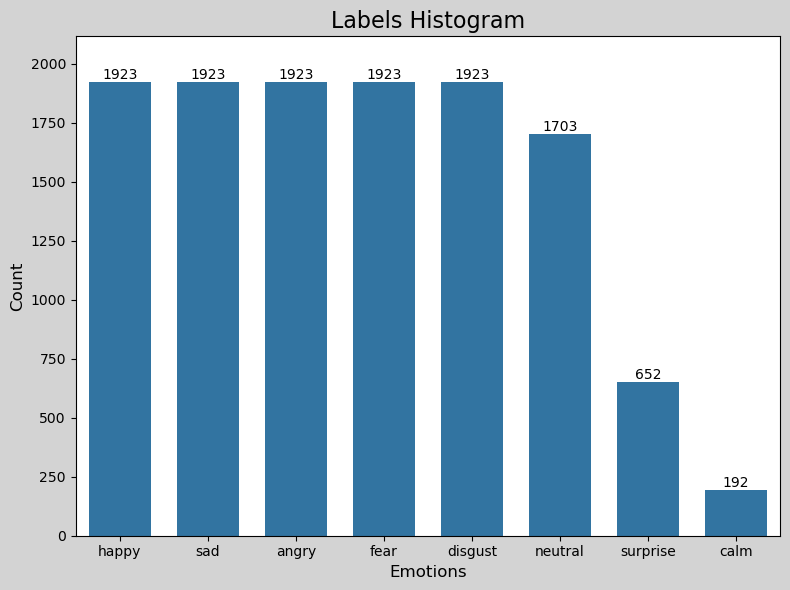

In [20]:
# Plot the count of each emotion
plt.figure(figsize=(8, 6), facecolor='lightgrey')

# sns.countplot(data=data_path, x='Emotions', order=data_path['Emotions'].value_counts().index, palette=custom_palette)
sns.countplot(data=data_path, x='Emotions', order=data_path['Emotions'].value_counts().index, width=0.7)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)
plt.title('Labels Histogram', size=16)

# Add count values on top of each bar
for index, value in enumerate(data_path['Emotions'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Adjusting y-axis limit to show more
plt.ylim(0, data_path['Emotions'].value_counts().max() * 1.1)

# Add equal spacing after the plot from the right and left
plt.subplots_adjust(left=0.1, right=0.9)

plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()

As we can see, **calm** & **surprise** have fewer instances.

<u>We are dealing with imbalanced classes, lets review possible solutions: </u>

1. **Class Weighting:** ML algorithms, such as logistic regression, decision trees, and random forests, support assigning different weights to classes.
2. **Oversampling:** Increasing the number of instances in the minority class to balance the class distribution.This include duplicating existing samples, generating synthetic samples using algorithms like SMOTE (Synthetic Minority Over-sampling Technique), or bootstrapping.
3. **Undersampling:** Undersampling involves reducing the number of instances in the majority class to balance the class distribution. **Undersampling may result in the loss of valuable information.**
4. **Data Augmentation:** Creating new samples by applying transformations to existing samples. This can help increase the diversity of the dataset and improve the model's ability to generalize to minority classes.
5. **Ensemble Methods:** Ensemble methods, such as bagging and boosting, can be effective in handling imbalanced datasets. By combining multiple models trained on different subsets of the data, ensemble methods can improve the overall performance and robustness of the classifier.
6. **Evaluation Metrics:** It's essential to use appropriate evaluation metrics that account for class imbalance. Common metrics include precision, recall, F1-score, and area under the ROC curve (AUC-ROC).

<u>Drawbacks of having only a few instances of a specific class/label include:</u>
1. **Poor Generalization:** The model may struggle to generalize well to the minority class, leading to low performance on unseen data.
2. **Biased Predictions:** The model may exhibit bias towards the majority class, resulting in inaccurate predictions for the minority class.
3. **Misclassification:** Instances of the minority class may be misclassified more frequently, leading to higher false negative rates.

#### **Our Conclusion**
After further checking, we decided to join 'calm' and 'neutral' classes together. The reason is that the signals are very similar and the main difference is the pace in which they talk - where 'calm' is slower then 'neutral' talk, thus even if the model could identify between these two, it would not be relevant for our use case.

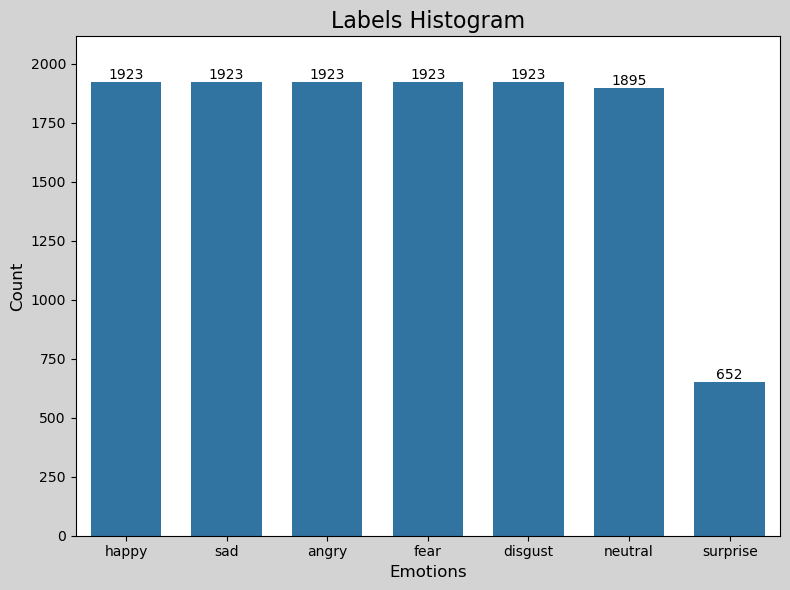

In [21]:
# Define custom color palette
# custom_palette = sns.color_palette('pastel')  # You can choose any palette you like

# Assuming data_path is your DataFrame
data_path['Emotions'] = data_path['Emotions'].replace('calm', 'neutral')

# Plot the count of each emotion
plt.figure(figsize=(8, 6), facecolor='lightgrey')

# sns.countplot(data=data_path, x='Emotions', order=data_path['Emotions'].value_counts().index, palette=custom_palette)
sns.countplot(data=data_path, x='Emotions', order=data_path['Emotions'].value_counts().index, width=0.7)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)
plt.title('Labels Histogram', size=16)

# Add count values on top of each bar
for index, value in enumerate(data_path['Emotions'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Adjusting y-axis limit to show more
plt.ylim(0, data_path['Emotions'].value_counts().max() * 1.1)

# Add equal spacing after the plot from the right and left
plt.subplots_adjust(left=0.1, right=0.9)

plt.tight_layout()  # Adjust layout to prevent overlapping text
plt.show()

<u>We can also plot waveplots and spectograms for audio signals</u>

- **Waveplots** - Waveplots let us know the loudness of the audio at a given time.
- **Spectograms** - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [22]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr, color="slateblue")
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [23]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

### Feature Extraction
Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.


<u>The audio signal is a three-dimensional signal in which three axes represent **time**, **amplitude** and **frequency**</u>

![image.png](https://miro.medium.com/max/633/1*7sKM9aECRmuoqTadCYVw9A.jpeg)

With the help of the sample rate and the sample data, we can perform several transformations to extract valuable features:
01. **Zero Crossing Rate** : The rate of sign-changes of the signal during the duration of a particular frame.
02. **Energy** : The sum of squares of the signal values, normalized by the respective frame length.
03. **Entropy of Energy** : The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.
04. **Spectral Centroid** : The center of gravity of the spectrum.
05. **Spectral Spread** : The second central moment of the spectrum.
06. **Spectral Entropy** :  Entropy of the normalized spectral energies for a set of sub-frames.
07. **Spectral Flux** : The squared difference between the normalized magnitudes of the spectra of the two successive frames.
08. **Spectral Rolloff** : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.
09.  **MFCCs Mel Frequency Cepstral Coefficients** : form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.
10. **Chroma Vector** : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).
11. **Chroma Deviation** : The standard deviation of the 12 chroma coefficients.


In this project we try to go deep into feature selection process.

In [24]:
def extract_features(data):
    # ZCR = zero crossing rate
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr)) # stacking horizontally
    if 'ZCR' not in feature_groups:
        feature_groups['ZCR'] = len(zcr)

    # Chroma_stft = short time fourier transform
    # stft = two-dimensional numpy array representing the magnitude spectrogram of the audio.
    # chroma_stft = 12-element vector representing the chroma features extracted from the audio.    
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally
    if 'Chroma' not in feature_groups:
        feature_groups['Chroma'] = len(chroma_stft)
 
    # MFCC = Mel-frequency cepstral coefficients = 12 coefficients that collectively make up an MFC.
    # MFCC 1: Overall spectral energy distribution.
    # MFCC 2: Spectral energy distribution, emphasizing spectral features.
    # MFCC 3-12: Higher-order coefficients representing additional spectral features, such as formants, timbre, and harmonics.
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    if 'MFCC' not in feature_groups:
        feature_groups['MFCC'] = len(mfcc)

    # RMS = Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally
    if 'RMS' not in feature_groups:
        feature_groups['RMS'] = len(rms)

    # Mean operation computes the average power spectral density across all frequency bins for each time frame. (120 values)
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)[:mel_size]
    result = np.hstack((result, mel)) # stacking horizontally
    if 'PSD' not in feature_groups:
        feature_groups['PSD'] = len(mel)

    # AHSM feature 1D array (6X1)
    ahsm = librosa.feature.tonnetz(y=data, sr=sample_rate).mean(axis=1)
    result = np.hstack((result, ahsm)) # stacking horizontally
    if 'AHSM' not in feature_groups:
        feature_groups['AHSM'] = len(ahsm)

    return result

def get_features(path):
    """
    Extracts features from audio data using various augmentations.

    Parameters:
    path (str): The path to the audio file.

    Returns:
    numpy.ndarray: A 2D array containing the extracted features.
                   The shape of the array is (n, m), where n is the number of augmentations
                   and m is the number of features extracted from each augmentation.
    """

    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

### Feature Extraction Loop 


In [25]:
# |----------------------------------------------|---------|----------------------|-----------------------|---------|-------------------------------------|------------|--------|
# |        SIGNALS                               | ZCR (1) | Chroma features (12) | Mel coefficients (20) | RMS (1) | Average Power Spectral Density (128)| AHSM (6)   |Emotion |
# |----------------------------------------------|---------|----------------------|-----------------------|---------|-------------------------------------|------------|--------|
# | signals with no augmentation         (12162) |         |                      |                       |         |                                     |            |        |
# | signals with noise                   (12162) |         |                      |                       |         |                                     |            |        |
# | signals with stretching and pitching (12162) |         |                      |                       |         |                                     |            |        |
# |----------------------------------------------|---------|----------------------|-----------------------|---------|-------------------------------------|------------|--------|

X, Y = [], []
Features = pd.read_csv(features_path) if os.path.exists(features_path) else None
if Features is None:
    for path, emotion in zip(data_path.Path, data_path.Emotions):
        feature = get_features(path)
        for ele in feature:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)


After we applied data augmentation and extracted the features for each audio files, we save them in a csv file.

|                                              | ZCR     | Chroma features      | Mel coefficients (20) | RMS | Average Power Spectral Density (128)| AHSM (6)   |Emotion |
|----------------------------------------------|---------|----------------------|-----------------------|-----|-------------------------------------|------------|--------|
| signals with no augmentation         (12162) |         |                      |                       |     |                                     |            |        |
| signals with noise                   (12162) |         |                      |                       |     |                                     |            |        |
| signals with stretching and pitching (12162) |         |                      |                       |     |                                     |            |        |

### **<u>Step 1:</u>** Data Preparation

In [26]:
SAMPLE_SIZE = int(len(X)/3)
print(feature_groups)

{}


In [27]:
SAMPLE_SIZE = int(len(X)/3)

# Chroma features keys
chroma_keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# ahsm features keys
ahsm_keys = ['AHSM1', 'AHSM2', 'AHSM3', 'AHSM4', 'AHSM5', 'AHSM6']

# mfcc coefficients keys
mfcc_size = feature_groups.get('MFCC') or mfcc_size
mel_keys = ['mel_c{}'.format(i) for i in range(1, mfcc_size+1)]

# mel coefficients - PSD keys
mel_size = feature_groups.get('PSD') or mel_size
psd_keys = ['psd{}'.format(i) for i in range(1, mel_size+1)]

# Add labels to each column
column_labels = ['zcr'] + chroma_keys + mel_keys + ['rms'] + psd_keys + ahsm_keys

# Add row labels to each row (12162 signals from each augmented group)
row_labels = ['No aug'] * SAMPLE_SIZE + ['Noise'] * SAMPLE_SIZE + ['Stretc + Pitch'] * SAMPLE_SIZE

# Create a DataFrame with the features and emotion labels
if Features is None:
    Features = pd.DataFrame(X, columns=column_labels, index=row_labels)
    Features['Emotion'] = Y
    # Save the DataFrame to a CSV file named 'features.csv'
    Features.to_csv('data/features.csv', index=False)

# Display the first few rows of the DataFrame (36486 signals, 163)
Features.head()

,zcr,C,C#,D,D#,E,F,F#,G,G#,...,psd118,psd119,psd120,AHSM1,AHSM2,AHSM3,AHSM4,AHSM5,AHSM6,Emotion
0,0.321275,0.729664,0.750033,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,3.512460e-06,3.811213e-06,4.310903e-06,-0.039651,0.017605,-0.038968,-0.058740,0.016288,0.010934,neutral
1,0.334635,0.828826,0.829732,0.816194,0.831222,0.807704,0.693664,0.709389,0.753685,0.779218,...,1.221466e-04,1.288000e-04,1.300054e-04,-0.006954,-0.001759,-0.044459,0.008414,0.000861,0.005178,neutral
2,0.188256,0.622125,0.699215,0.753343,0.721212,0.701727,0.682356,0.662828,0.686486,0.733960,...,7.486865e-07,7.141637e-07,8.579052e-07,0.020187,-0.004298,0.011253,-0.072589,0.008186,-0.004174,neutral
3,0.293566,0.673896,0.722096,0.723508,0.682302,0.680533,0.675352,0.628977,0.679179,0.707283,...,5.876729e-06,7.126558e-06,6.984504e-06,-0.068961,0.034252,-0.058583,-0.055763,0.014269,-0.005250,neutral
4,0.322189,0.789123,0.824663,0.805617,0.789116,0.799166,0.723979,0.661949,0.710592,0.738885,...,9.904428e-05,9.949555e-05,9.857351e-05,-0.011787,0.005438,-0.051323,0.009024,0.003488,-0.003951,neutral


X = The DataFrame of features  
Y = The DataFrame of only the emotion labels

In [28]:
# Extracting features (X) and target (Y) from the 'Features' DataFrame
X = Features.iloc[:, :-1].values  # Selecting all rows and all columns except the last one as features
Y = Features['Emotion'].values    # Selecting the 'Emotion' column as the target

# Printing the shapes of the feature matrix (X) and target array (Y)
print(f"X shape: {X.shape[0]} X {X.shape[1]}")
print(f"Y shape: {Y.shape[0]} X 1")

X shape: 36486 X 160
Y shape: 36486 X 1


### **<u>Step 2:</u>** Encode the Classes

In [29]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y_encoded = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
encoded_string = ' '.join([str(int(x)) for x in Y_encoded[0]])
print(f"For example, {GREEN}{Y[0]}{RESET} {BLUE}is{RESET} encoded {BLUE}as{RESET} {GREEN}{encoded_string}{RESET}")

For example, neutral is encoded as 0 0 0 0 1 0 0


### **<u>Step 3:</u>** Split the Data into:
1. Train Set
2. Test Set

In [30]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# check dimension of x_train and x_test
print(f"x_train: {x_train.shape[0]} X {x_train.shape[1]}, y_train: {y_train.shape[0]} X 1")
print(f"x_test: {x_test.shape[0]} X {x_test.shape[1]},   y_test: {y_test.shape[0]} X 1")

x_train: 27364 X 160, y_train: 27364 X 1
x_test: 9122 X 160,   y_test: 9122 X 1


### **<u>Step 4:</u>** Feature Scaling  
Normalizing the test set with the same mean and standard deviation. Center the data by subtracting the mean and divide the result by the standard deviation
$$ x' = \frac{{x - \mu}}{{\sigma}} $$

We do that on the **training set** of the data. But then we have to apply the same transformation to your test set (e.g. in cross-validation), or to newly obtained examples before forecasting. Keep in mind that we have to use the exact same two parameters μ and σ (values) that we used for centering the training set.

Hence, every scikit-learn's **transform's fit()** just calculates the parameters (e.g. μ and σ in case of StandardScaler) and saves them as an internal object's state.  
Afterwards, we can call its **transform()** method to apply the transformation to any particular set of examples.

**fit_transform()** joins these two steps and is used for the initial fitting of parameters on the training set x, while also returning the transformed x′. Internally, the transformer object just calls first fit() and then transform() on the same data.

In [31]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set & test set
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


### **<u>Step 5:</u>** Model Selection and Training

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 6: Model Selection and Training

# Compute class weights - balancing the data with class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create a RandomForestClassifier with class weights
# model = RandomForestClassifier(class_weight=dict(zip(np.unique(y_train), class_weights)), random_state=42)

model = RandomForestClassifier() 
model.fit(x_train, y_train)

RandomForestClassifier()

### **<u>Step 6:</u>** Extract Feature Importance

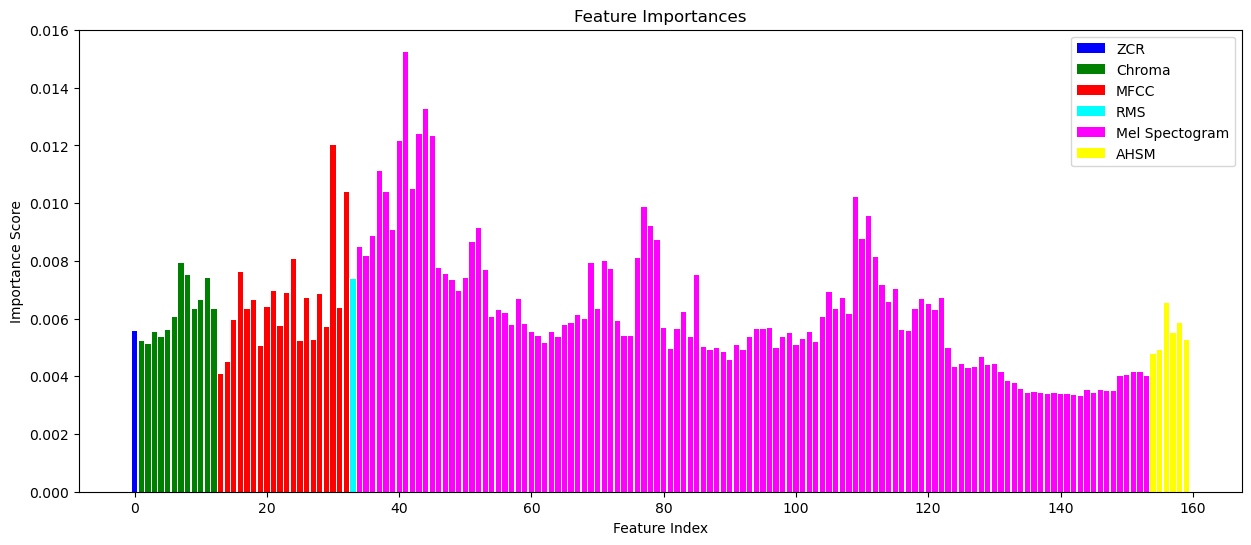

In [41]:
# Define the number of features in each group and class labels
group_sizes = [1, 12, 20, 1, 120, 6]
class_labels =["ZCR", "Chroma", "MFCC", "RMS", "Mel Spectogram", "AHSM"]

# Define colors for each group
# group_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
colors = select_colors(group_colors, len(group_sizes))

# Get feature importances
importances = model.feature_importances_

# Initialize starting index for each group
start_index = 0

# Plot feature importances with colors for each group
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.title("Feature Importances")

# for i, (label, size) in enumerate(feature_groups.items()):
#     end_index = start_index + size
#     group_importances = importances[start_index:end_index]
    
#     # Create spaced out indices for better visualization
#     spaced_indices = np.linspace(start_index, end_index - 1, num=size)
#     plt.bar(spaced_indices, group_importances, align="center", color=colors[i], label=label)
#     start_index = end_index

for i, size in enumerate(group_sizes):
    end_index = start_index + size
    group_importances = importances[start_index:end_index]
    
    # Create spaced out indices for better visualization
    spaced_indices = np.linspace(start_index, end_index - 1, num=size)
    
    plt.bar(spaced_indices, group_importances, align="center", color=group_colors[i], label=class_labels[i])
    start_index = end_index

plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.legend()
plt.show()

### **<u>Step 7:</u>** Model Evaluation
1. Report
2. Confusion Matrix

Training size: 27364
Testing size: 9122
Training score: 0.67

Prediction Train Accuracy: 99.98%
Prediction Test Accuracy: 67.33%
              precision    recall  f1-score   support

     neutral       0.72      0.80      0.76      1438
       happy       0.62      0.60      0.61      1468
         sad       0.79      0.51      0.62      1424
       angry       0.65      0.61      0.63      1462
        fear       0.64      0.72      0.68      1447
     disgust       0.62      0.76      0.68      1408
    surprise       0.91      0.80      0.85       475

    accuracy                           0.67      9122
   macro avg       0.70      0.69      0.69      9122
weighted avg       0.68      0.67      0.67      9122



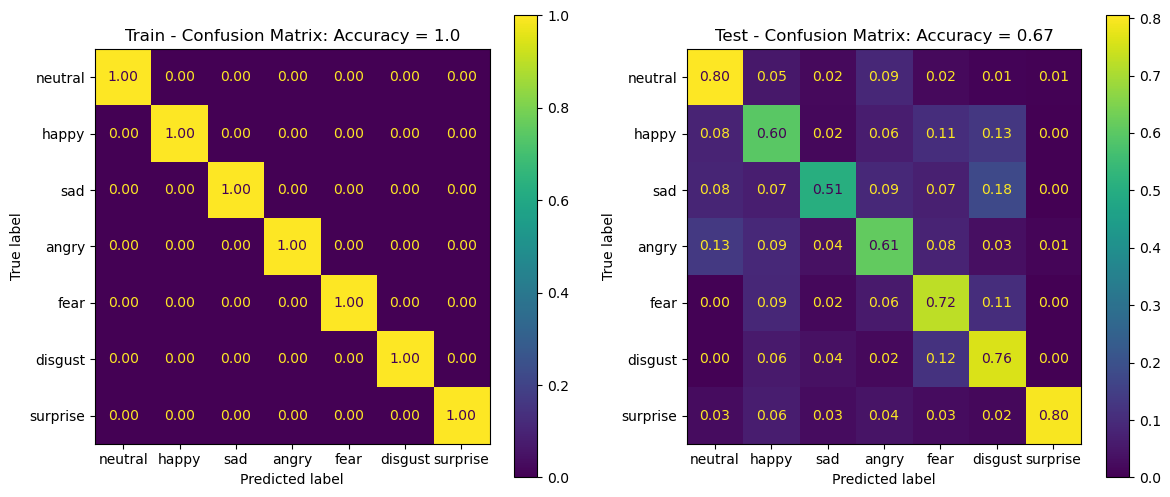

In [34]:
print(f"Training size: {len(x_train)}")
print(f"Testing size: {len(x_test)}")
print(f"Training score: {model.score(x_test, y_test):.2f}\n")

labels = ['neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']

# get tain predict and accuracy
y_train_pred = model.predict(x_train)
train_accuracy = model.score(x_train, y_train)

# get test predict and accuracy
y_pred = model.predict(x_test)
test_accuracy = model.score(x_test, y_test)

# print report
print(f'Prediction Train Accuracy: {train_accuracy*100:3.2f}%')
print(f'Prediction Test Accuracy: {test_accuracy*100:3.2f}%')
print(classification_report(y_true = y_test, y_pred = y_pred, target_names=labels))

# plot confusion matrix
# plot_confusion_matrix(vY=y_test, vYPred=y_pred, normMethod='true', lLabels=labels, valFormat='.2f')

plt.figure(figsize=(14, 6))
ax = plt.subplot(1,2,1)
lConfMatTrainData = {'vY': y_train, 'vYPred':y_train_pred, 'hA': ax, 'dScore': {'Accuracy': train_accuracy}, 'titleStr': 'Train - Confusion Matrix', 'lLabels': labels, 'valFormat': '.2f', 'normMethod': 'true'}
plot_confusion_matrix(**lConfMatTrainData)
ax = plt.subplot(1,2,2)
lConfMatTestData = {'vY': y_test, 'vYPred':y_pred, 'hA': ax, 'dScore': {'Accuracy': test_accuracy}, 'titleStr': 'Test - Confusion Matrix', 'lLabels': labels, 'valFormat': '.2f', 'normMethod': 'true'}
plot_confusion_matrix(**lConfMatTestData)
plt.show()
    

#### **CONCLUSIONS**
<u>As we can see in the confusion matrix, we have 3 classes with low score:</u>

1. **neutral:** 0.81 - with good recall (0.81) and modest precision (0.73)
2. **happy:** 0.60 - with poor recall (0.60) and precision (0.64)
3. **sad:** 0.51 - with very poor recall (0.51) but modest precision (0.77) 
4. **angry:** 0.63 - with poor recall (0.63) and poor precision (0.65)
5. **fear:** 0.72 - with modest recall (0.72) but poor precision (0.64)
6. **disgust:** 0.76 - with modest recall (0.76) and poor precision (0.62)
7. **surprise:** 0.80 - with very good precision (0.91) and good recall (0.8)
 

### **<u>Step 9:</u>** Correlation Heat Map

(160, 160)


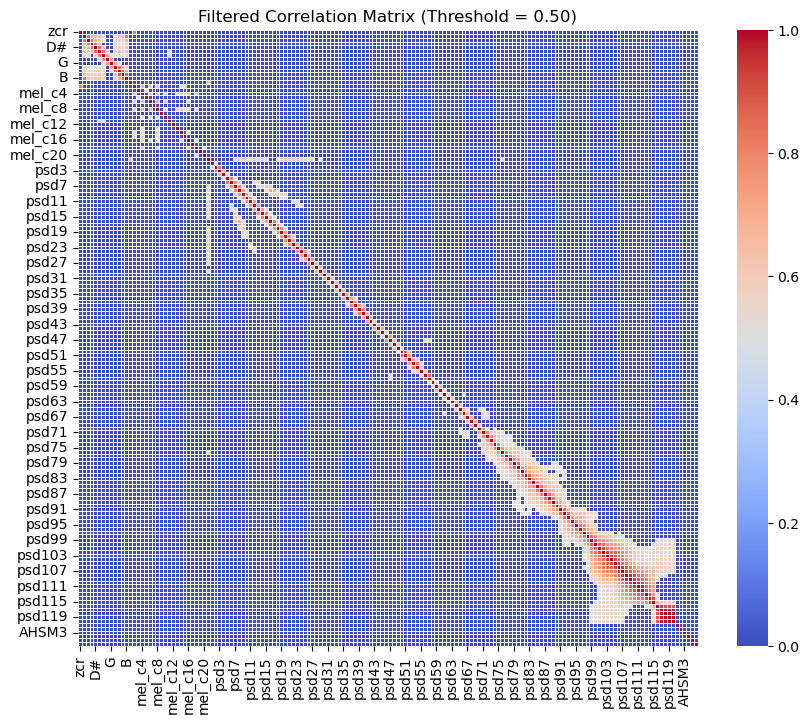

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Drop the 'Emotion' column to get the features
features = Features.drop(columns=['Emotion'])

# Calculate the correlation matrix
corr_matrix = features.corr()

# print shape of the correlation matrix
print(corr_matrix.shape)

# Set correlation threshold
threshold = 0.5

# Filter out correlations below the threshold
corr_matrix_filtered = corr_matrix.abs()  # Take absolute values to consider negative correlations as well
corr_matrix_filtered = corr_matrix_filtered.mask(corr_matrix_filtered < threshold, 0)

# Plot the filtered correlation heatmap without annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_filtered, cmap='coolwarm', linewidths=0.5)
plt.title('Filtered Correlation Matrix (Threshold = {:.2f})'.format(threshold))
plt.show()

### **<u>Step 10:</u>** Dimensional Reduction - PCA
We use Principal Component Analysis (PCA) to reduce the number of features and improve computational efficiency, reduce the dimensionality of the feature space, remove noise from the dataset while retaining most of the information. 

Also, lets look at the correlation heatmap after dimensionality reduction:

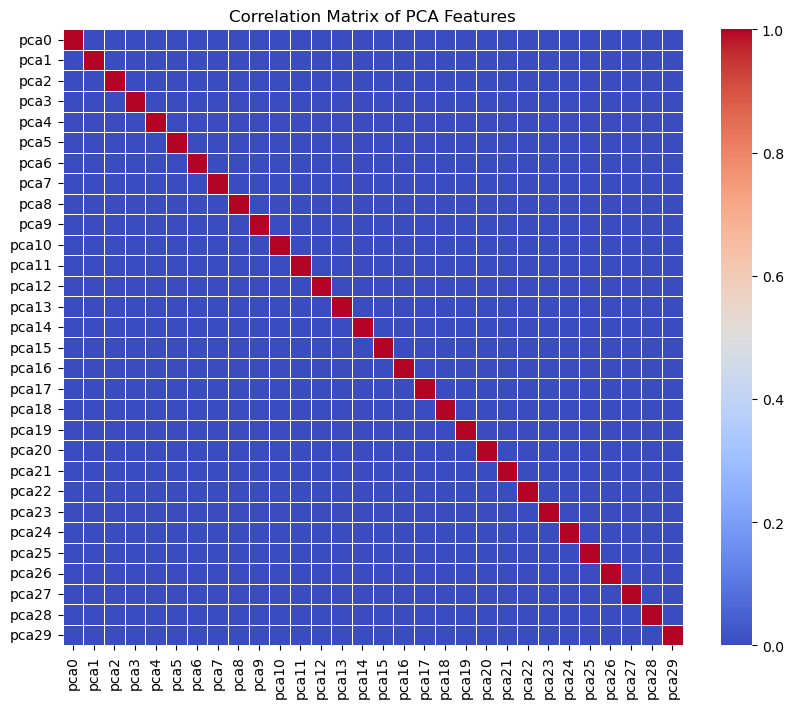

Size of PCA features: 30 vs Size of original features: 160


In [36]:
from sklearn.decomposition import PCA

# Apply PCA conserving 98% efficiency
pca = PCA(n_components=0.98).set_output(transform="pandas")
pca_features = pca.fit_transform(Features.drop(columns=Features.columns[-1]))

# pca_component_names = [f'PC{i}' for i in range(1, pca.n_components_ + 1)]

# Transform the PCA features back to a DataFrame
# pca_df = pd.DataFrame(data=pca_features, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

# Plot the correlation heatmap for the PCA features
corr_matrix_pca = pca_features.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pca, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of PCA Features')
plt.show()

# Print the shape of the PCA features
print(f"Size of PCA features: {pca_features.shape[1]} vs Size of original features: {x_train.shape[1]}")


Train the model again, this time with less features, after filtering them using PCA library

Training pca size: 27364
Testing pca size: 9122
Training pca score: 0.67

Prediction Train Accuracy: 99.98%
Prediction Test Accuracy: 67.47%
              precision    recall  f1-score   support

     neutral       0.73      0.80      0.76      1438
       happy       0.61      0.59      0.60      1468
         sad       0.78      0.51      0.62      1424
       angry       0.64      0.61      0.63      1462
        fear       0.65      0.74      0.69      1447
     disgust       0.62      0.76      0.68      1408
    surprise       0.92      0.79      0.85       475

    accuracy                           0.67      9122
   macro avg       0.71      0.69      0.69      9122
weighted avg       0.68      0.67      0.67      9122



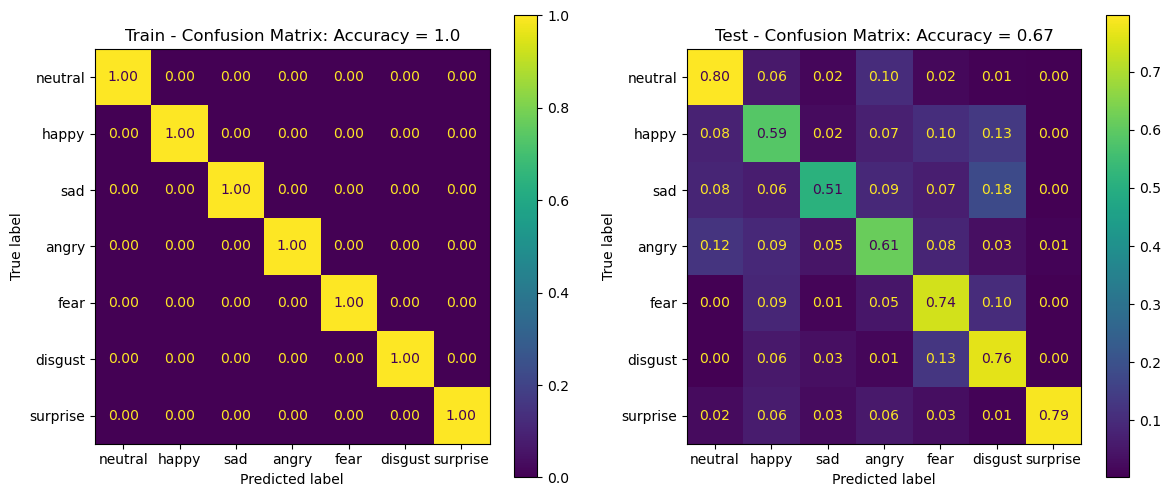

In [42]:
# Step 1: Split data into training and testing sets
pca_x_train, pca_x_test, pca_y_train, pca_y_test = train_test_split(pca_features, Y, random_state=0, shuffle=True)

# Step 2: Normalize the data
pca_x_train_scaled = scaler.fit_transform(x_train)
pca_x_test_scaled = scaler.transform(x_test)

# Step 3: Train the model using the PCA training data
model = RandomForestClassifier() 
model.fit(pca_x_train_scaled, pca_y_train)

# Step 4: Model training is complete, proceed with evaluation
# Predict on the testing data
print(f"Training pca size: {len(pca_x_train_scaled)}")
print(f"Testing pca size: {len(pca_x_test_scaled)}")
print(f"Training pca score: {model.score(pca_x_test_scaled, pca_y_test):.2f}\n")

# get tain predict and accuracy
pca_y_train_pred = model.predict(pca_x_train_scaled)
pca_train_accuracy = model.score(pca_x_train_scaled, pca_y_train)

# get test predict and accuracy
pca_y_pred = model.predict(pca_x_test_scaled)
pca_test_accuracy = model.score(pca_x_test_scaled, pca_y_test)

# print report
print(f'Prediction Train Accuracy: {pca_train_accuracy*100:3.2f}%')
print(f'Prediction Test Accuracy: {pca_test_accuracy*100:3.2f}%')
print(classification_report(y_true = pca_y_test, y_pred = pca_y_pred, target_names=labels))

# plot confusion matrix
# plot_confusion_matrix(vY=y_test, vYPred=y_pred, normMethod='true', lLabels=labels, valFormat='.2f')

plt.figure(figsize=(14, 6))
ax = plt.subplot(1,2,1)
lConfMatTrainData = {'vY': pca_y_train, 'vYPred':pca_y_train_pred, 'hA': ax, 'dScore': {'Accuracy': pca_train_accuracy}, 'titleStr': 'Train - Confusion Matrix', 'lLabels': labels, 'valFormat': '.2f', 'normMethod': 'true'}
plot_confusion_matrix(**lConfMatTrainData)
ax = plt.subplot(1,2,2)
lConfMatTestData = {'vY': pca_y_test, 'vYPred':pca_y_pred, 'hA': ax, 'dScore': {'Accuracy': pca_test_accuracy}, 'titleStr': 'Test - Confusion Matrix', 'lLabels': labels, 'valFormat': '.2f', 'normMethod': 'true'}
plot_confusion_matrix(**lConfMatTestData)
plt.show()

### **<u>Step 11:</u>** Cross-Validation
Cross-validation is a robust technique used to assess the performance of machine learning models by splitting the dataset into multiple subsets and training the model on different combinations of these subsets. In a multiclass classification project, you can perform cross-validation using techniques such as k-fold cross-validation or stratified k-fold cross-validation. Here's how you can do it using scikit-learn:

1. <u>k-fold Cross-Validation:</u>
- In k-fold cross-validation, the dataset is divided into k equal-sized folds.
- The model is trained k times, each time using k-1 folds as training data and the remaining fold as validation data.
- The performance metrics are averaged over the k iterations to get a more reliable estimate of the model's performance.

When performing cross-validation, we use different random states for each fold ( in our classifier). This helps in assessing the robustness of the model across different random splits of the data. You can try multiple random states and average the results to get a more reliable estimate of model performance.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds
num_folds = 5

# Perform k-fold cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
scores = cross_val_score(model, pca_x_train, pca_y_train, cv=kfold, scoring='accuracy')

# Print the average accuracy across all folds
print(f"Average Accuracy: {scores.mean()}, with: {kfold}")

Average Accuracy: 0.5547437086152863, with: KFold(n_splits=5, random_state=42, shuffle=True)


2. <u>Stratified k-fold Cross-Validation:</u>
- Stratified k-fold cross-validation maintains the class distribution in each fold, ensuring that each fold is representative of the overall class distribution.
- This is particularly useful for imbalanced datasets where some classes may have fewer samples than others.

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
skf_scores = cross_val_score(model, pca_x_train, pca_y_train, cv=kfold, scoring='accuracy')

# Print the average accuracy across all folds
print(f"Average Accuracy: {skf_scores.mean()}, with: {skf}")

Average Accuracy: 0.5549627664462331, with: StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


### **<u>Step 12:</u>** Hyperparameter Tuning
Tuning hyperparameters using techniques like grid search or random search:
We specify a fixed **random state** to ensure that the results are consistent across different runs. This allows us to compare the performance of different hyperparameter configurations accurately.

### **<u>Step 13:</u>** Grid Search
When performing grid search to find the best hyperparameters, we can include the following parameters as our chosen hyperparameters to search over:
1. random state